# Proyecto Statistical Learning

Nancy Patricia Girón Muñoz - 19007084

### Importando paquetes 

In [1]:
import pandas as pd
import numpy as np
import sklearn as scl
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder

### Importando data

In [2]:
dataset = pd.read_csv('data_titanic_proyecto.csv')
dataset.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId           891 non-null int64
Name                  891 non-null object
Age                   714 non-null float64
SibSp                 891 non-null int64
Parch                 891 non-null int64
Ticket                891 non-null object
Fare                  891 non-null float64
Cabin                 204 non-null object
Embarked              889 non-null object
passenger_class       891 non-null object
passenger_sex         891 non-null object
passenger_survived    891 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 83.6+ KB


Realizamos la cuenta de los valores y cuantas clasificaciones hay de Embarked y depassenger_class. 

In [4]:
dataset["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
dataset["passenger_class"].value_counts()

Lower     491
Upper     216
Middle    184
Name: passenger_class, dtype: int64

### Estadistica Decriptiva

In [6]:
dataset.describe() 

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


### Eliminando columnas 

Se eliminan las columnas que desde el inicio no aportara. Por ejemplo el nombre de la persona, el ticket, la cabina, etc. Se determino que no eran variables predictoras debido al formato de cada una de ellas. 

In [7]:
dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
dataset.head()

,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
0,22.0,1,0,7.2500,S,Lower,M,N
1,38.0,1,0,71.2833,C,Upper,F,Y
2,26.0,0,0,7.9250,S,Lower,F,Y
3,35.0,1,0,53.1000,S,Upper,F,Y
4,35.0,0,0,8.0500,S,Lower,M,N


### Determinacion de NAs

La edad fue la unica que tenia registros con NAs, por lo que se sustituyeron con la media de los valores ya que no queremos perder registros que puedan ser significantes. 

In [8]:
print("cantidad de casillas null ->", dataset['Age'].isnull().sum())
print("cantidad de casillas null ->",dataset['SibSp'].isnull().sum())
print("cantidad de casillas null ->",dataset['Parch'].isnull().sum())
print("cantidad de casillas null ->",dataset['Fare'].isnull().sum())
print("cantidad de casillas null ->",dataset['passenger_class'].isnull().sum())
print("cantidad de casillas null ->",dataset['passenger_sex'].isnull().sum())
print("cantidad de casillas null ->",dataset['passenger_survived'].isnull().sum())
print("cantidad de casillas null ->",dataset['Embarked'].isnull().sum())

cantidad de casillas null -> 177
cantidad de casillas null -> 0
cantidad de casillas null -> 0
cantidad de casillas null -> 0
cantidad de casillas null -> 0
cantidad de casillas null -> 0
cantidad de casillas null -> 0
cantidad de casillas null -> 2


In [9]:
dataset.loc[:,"Age"].mean()
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
dataset['Age'].isnull().sum()

0

In [10]:
dataset.loc[:,"Embarked"].mode()
dataset['Embarked'] = dataset['Embarked'].fillna('S')
dataset['Embarked'].isnull().sum()

0

In [11]:
dataset.head()

,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived
0,22.0,1,0,7.2500,S,Lower,M,N
1,38.0,1,0,71.2833,C,Upper,F,Y
2,26.0,0,0,7.9250,S,Lower,F,Y
3,35.0,1,0,53.1000,S,Upper,F,Y
4,35.0,0,0,8.0500,S,Lower,M,N


### Onehot Encoding

Se realiza el onehot encoding para que se acepten variables categoricas. Las variables categoricas se convierten en variables numericas 0/1. 

La columna Sex se convierte a hombre y contiene 1 si es hombre, el 0 indica el sexo femenino. 

In [12]:
dataset["Male"] = (dataset["passenger_sex"] == 'M').astype(np.float)
dataset.head()

,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived,Male
0,22.0,1,0,7.2500,S,Lower,M,N,1.0
1,38.0,1,0,71.2833,C,Upper,F,Y,0.0
2,26.0,0,0,7.9250,S,Lower,F,Y,0.0
3,35.0,1,0,53.1000,S,Upper,F,Y,0.0
4,35.0,0,0,8.0500,S,Lower,M,N,1.0


Separamos las columnas de Embarque para realizar el onehot encoding.

In [13]:
dataset["E_S"] = (dataset["Embarked"] == 'S').astype(np.float32)
dataset["E_C"] = (dataset["Embarked"] == 'C').astype(np.float32)
dataset["E_Q"] = (dataset["Embarked"] == 'Q').astype(np.float32)
dataset.head()

,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived,Male,E_S,E_C,E_Q
0,22.0,1,0,7.2500,S,Lower,M,N,1.0,1.0,0.0,0.0
1,38.0,1,0,71.2833,C,Upper,F,Y,0.0,0.0,1.0,0.0
2,26.0,0,0,7.9250,S,Lower,F,Y,0.0,1.0,0.0,0.0
3,35.0,1,0,53.1000,S,Upper,F,Y,0.0,1.0,0.0,0.0
4,35.0,0,0,8.0500,S,Lower,M,N,1.0,1.0,0.0,0.0


Separamos las columnas de pasajeros para realizar el onehot encoding.

In [14]:
dataset["Class_Lower"] = (dataset["passenger_class"] == 'Lower').astype(np.float32)
dataset["Class_Middle"] = (dataset["passenger_class"] == 'Middle').astype(np.float32)
dataset["Class_Upper"] = (dataset["passenger_class"] == 'Upper').astype(np.float32)
dataset.head()

,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived,Male,E_S,E_C,E_Q,Class_Lower,Class_Middle,Class_Upper
0,22.0,1,0,7.2500,S,Lower,M,N,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,38.0,1,0,71.2833,C,Upper,F,Y,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,26.0,0,0,7.9250,S,Lower,F,Y,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,35.0,1,0,53.1000,S,Upper,F,Y,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,35.0,0,0,8.0500,S,Lower,M,N,1.0,1.0,0.0,0.0,1.0,0.0,0.0


Separamos las columnas de sobrevivientes para realizar el onehot encoding.

In [15]:
dataset["Survived"] = (dataset["passenger_survived"].values == 'Y').astype(np.float32)
dataset.head()

,Age,SibSp,Parch,Fare,Embarked,passenger_class,passenger_sex,passenger_survived,Male,E_S,E_C,E_Q,Class_Lower,Class_Middle,Class_Upper,Survived
0,22.0,1,0,7.2500,S,Lower,M,N,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,38.0,1,0,71.2833,C,Upper,F,Y,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,26.0,0,0,7.9250,S,Lower,F,Y,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.0,1,0,53.1000,S,Upper,F,Y,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,35.0,0,0,8.0500,S,Lower,M,N,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Eliminamos las columnas que modificamos. 

In [16]:
dataset.drop(['passenger_sex', 'passenger_class', 'passenger_survived', 'Embarked'], axis=1, inplace=True)
dataset.head()

,Age,SibSp,Parch,Fare,Male,E_S,E_C,E_Q,Class_Lower,Class_Middle,Class_Upper,Survived
0,22.0,1,0,7.2500,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,38.0,1,0,71.2833,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,26.0,0,0,7.9250,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.0,1,0,53.1000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,35.0,0,0,8.0500,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Fare            891 non-null float64
Male            891 non-null float64
E_S             891 non-null float32
E_C             891 non-null float32
E_Q             891 non-null float32
Class_Lower     891 non-null float32
Class_Middle    891 non-null float32
Class_Upper     891 non-null float32
Survived        891 non-null float32
dtypes: float32(7), float64(3), int64(2)
memory usage: 59.2 KB


### Correlaciones 

In [18]:
correlations = dataset.corr()['Survived'].drop('Survived')
print(correlations)

Age            -0.069809
SibSp          -0.035322
Parch           0.081629
Fare            0.257307
Male           -0.543351
E_S            -0.149683
E_C             0.168240
E_Q             0.003650
Class_Lower    -0.322308
Class_Middle    0.093349
Class_Upper     0.285904
Name: Survived, dtype: float64


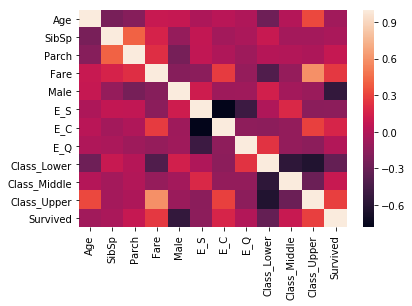

In [19]:
sns.heatmap(dataset.corr())
plt.show()

### Split Data

Dividimos la data en train, test y validation. 

In [20]:
from sklearn.model_selection import train_test_split

column_target = ['Survived']
column_model = [
                #'Age',
                'SibSp','Fare',
                'Male','E_S','E_C','E_Q',
                "Class_Lower", "Class_Middle", "Class_Upper"]

X = dataset[column_model]
Y = dataset[column_target]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)


In [21]:
Y_train.shape

(569, 1)

## Decision Trees Model

In [22]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [23]:
def  DTrees_train(x_train, y_train, x_val, y_val, n):
    #Entrenamiento
    clf = tree.DecisionTreeClassifier(random_state=0, max_depth = n)
    clf = clf.fit(X_train, Y_train)
    
    #Prediccion
    Y_predictTree = pd.DataFrame(clf.predict(X_val))
    
    #Metricas de la validacion
    acc = accuracy_score(Y_predictTree, Y_val)
    err = 1 - acc
    rep = classification_report(Y_val, Y_predictTree)
    f1 = f1_score(Y_val, Y_predictTree)
    prec = precision_score(Y_val, Y_predictTree)
    recall = recall_score(Y_val, Y_predictTree)
    
    vect_met = np.array([acc, err, f1, prec, recall])
    met = pd.DataFrame(vect_met, index=['Accuracy', 'Error', 'F1', 'Precision', 'Recall'], columns = ['valor'])
    metricas = [met, Y_predictTree]
    return metricas


In [24]:
train_tree = DTrees_train(X_train, Y_train, X_val, Y_val, 300)
train_tree[0]

,valor
Accuracy,0.804196
Error,0.195804
F1,0.758621
Precision,0.785714
Recall,0.733333


## SVM Model

In [25]:
from sklearn import svm 

In [26]:
def SVM_train(X_train, Y_train, X_val, Y_val):
    #Entrenamiento
    clf = svm.LinearSVC()
    clf.fit(X_train, Y_train)  
    
    #Prediccion 
    Y_predictSvm = clf.predict(X_val)
    
    #Metricas de la validacion
    acc = accuracy_score(Y_predictSvm, Y_val)
    err = 1 - acc
    rep = classification_report(Y_val, Y_predictSvm)
    f1 = f1_score(Y_val, Y_predictSvm)
    prec = precision_score(Y_val, Y_predictSvm)
    recall = recall_score(Y_val, Y_predictSvm)
    
    vect_met = np.array([acc, err, f1, prec, recall])
    met = pd.DataFrame(vect_met, index=['Accuracy', 'Error', 'F1', 'Precision', 'Recall'], columns = ['valor'])
    metricas = [met, Y_predictSvm]
    return metricas   

In [27]:
train_svm = SVM_train(X_train, Y_train, X_val, Y_val)
train_svm[0]

/Users/macbookpro/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/macbookpro/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


,valor
Accuracy,0.706294
Error,0.293706
F1,0.666667
Precision,0.636364
Recall,0.700000


## Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

In [34]:
def NaiveBayes_train(X_train, Y_train, X_val, Y_val):
    #Entrenamiento
    clf = GaussianNB()
    clf.fit(X_train, Y_train)
    
    #Prediccion 
    Y_predictNaiveB = clf.predict(X_val)   

    #Metricas de la validacion
    acc = accuracy_score(Y_predictNaiveB, Y_val)
    err = 1 - acc
    rep = classification_report(Y_val, Y_predictNaiveB)
    f1 = f1_score(Y_val, Y_predictNaiveB)
    prec = precision_score(Y_val, Y_predictNaiveB)
    recall = recall_score(Y_val, Y_predictNaiveB)
    
    vect_met = np.array([acc, err, f1, prec, recall])
    met = pd.DataFrame(vect_met, index=['Accuracy', 'Error', 'F1', 'Precision', 'Recall'], columns = ['valor'])
    metricas = [met, Y_predictNaiveB]
    return metricas 

In [35]:
train_NB = NaiveBayes_train(X_train, Y_train, X_val, Y_val)
train_NB[0]

/Users/macbookpro/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,valor
Accuracy,0.727273
Error,0.272727
F1,0.648649
Precision,0.705882
Recall,0.600000


## Logistic Regression

In [30]:
import tensorflow as tf
import time

In [31]:
X_train.shape

(569, 9)

In [32]:
def Reglogistica_train(X_train, Y_train, lr, lambda_val, epochs):
    yarr = Y_train.values
    m, n = X_train.shape

    #Placeholders
    X = tf.placeholder(tf.float32, shape = (None, n), name = "X")
    Y = tf.placeholder(tf.float32, name = "Y")

    #Hiperparámetros
    learning_rate = tf.placeholder(tf.float32, name = "lr")
    lmb = tf.placeholder(tf.float32, name = "lambda")

    # Coeficientes de regresión de logits, incluyendo intercepto
    W = tf.Variable(tf.truncated_normal(shape = [n, 1]), name = "W")
    b = tf.Variable(tf.truncated_normal(shape = (1, 1)), name = "b")
        
    with tf.name_scope("Logits"):
        Y_hat = tf.add(tf.matmul(X, W), b, name = "Logits")

    # Función de costo
    with tf.name_scope("FuncionCosto"):
        # Regulacion
        w_n = tf.divide(tf.multiply(tf.multiply(tf.constant(0.5), lmb), tf.reduce_sum(tf.square(W))), tf.cast(m, tf.float32), name = "W_n")
        # Costo por clasificación
        costo_class = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = Y, logits = Y_hat), name = "Costo_class") 
        # Costo total
        cost = tf.add(costo_class, w_n, name="Costo")

    # Gradient Descent Optimizer 
    with tf.name_scope("GradientDes.Optimizer"):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) 

    # Global Variables Initializer 
    init = tf.global_variables_initializer() 
        
    start = time.time()
    with tf.Session() as sess: 
        sess.run(init)

        for epoch in range(epochs):
            _, c_ = sess.run([optimizer, cost], 
                             feed_dict = {X : X_train, Y : yarr.reshape((m, 1)), learning_rate : lr, lmb : lambda_val})
            # Status
            if (epoch + 1) % round(epochs*0.1) == 0:
                print("Epoch: %d, \t costo = %0.4f" % (epoch+1, c_))
                
        # Obtener los parámetros finales para devolverlos
        w_, b_ = sess.run([W, b])
        
    end = time.time()
    print("Tiempo transcurrido: %0.2f segundos" % (end-start))
    
    # Devolver los parámetros
    return w_, b_

In [ ]:
w_, b_ = Reglogistica_train(X_train, Y_train, lr = 0.001, epochs = 200, lambda_val = 0.5)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


## Comparación

In [37]:
tree = train_tree[0].T
tree['Modelo'] = 'Decision tree'
tree = tree[['Modelo','Accuracy','Error','Precision','Recall','F1']]

SVM = train_svm[0].T
SVM['Modelo'] = 'SVM'
SVM = SVM[['Modelo','Accuracy','Error','Precision','Recall','F1']]

NB = train_NB[0].T
NB['Modelo'] = 'Naive Bayes'
NB = NB[['Modelo','Accuracy','Error','Precision','Recall','F1']]

In [38]:
comp=pd.concat([tree,SVM, NB],axis=0)
comp.index = ['0','1','2']
comp

,Modelo,Accuracy,Error,Precision,Recall,F1
0,Decision tree,0.804196,0.195804,0.785714,0.733333,0.758621
1,SVM,0.706294,0.293706,0.636364,0.700000,0.666667
2,Naive Bayes,0.727273,0.272727,0.705882,0.600000,0.648649


El mejor modelo segun se puede observar en la comparacion es el de Decision Trees.

## Bootstrap

Es una tecnica para el remuestreo el cual ayuda para que se generen muchas mas muestras en una poblacion definida. El tener mayor cantidad de datos ayuda a la hora de predecir y para la obtencion de mejores metricas y no tan sesgadas. Tiende a tener una distribucion normal cuando tenemos mas muestras. 



## K-folds

Es una tecnica que hubiera sido de gran ayuda para el proyecto debido a que consiste en dividir k veces el conjunto 
de datos que no son de prueba en los de train y val. Luego cada grupo dividido se visualiza como el test. Se pueden 
tener con esto, versiones menos sesgadas de la verdadera metrica ya que solo toma un conjunto. 